## EScalmiento, Normalizacion y Estandarizacion

En las tecnicas de aprendizaje automatico se le da más importancia a los numeros mayores porque represetan cambios mayores    
Para solucionar el sesgo en las tecnicas se busca implementar tecnicas que permitan evitar el sesgo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os 

In [2]:
ruta = r'Scripts\DATA_TOOLS\Escalamiento, normalizacion y estandarizacion\datos_personas.csv'
ruta = ruta.replace(os.sep,'/')

In [4]:
datos_personas = pd.read_csv(ruta)
datos_personas

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


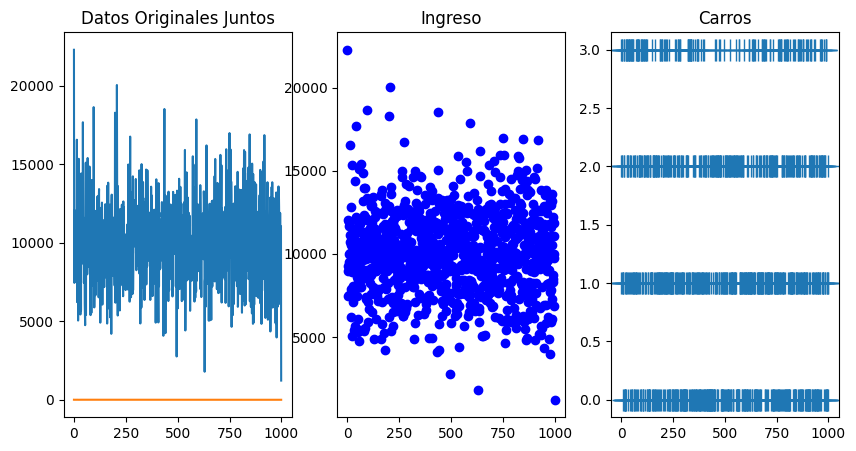

In [9]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_title('Datos Originales Juntos')
ax1.plot(datos_personas)
ax2.set_title('Ingreso')
ax2.plot(datos_personas['ingreso'], linewidth = 0, marker = 'o', color = 'blue', markersize = 6)
ax3.set_title('Carros')
ax3.plot(datos_personas['carros'], linewidth = 0, marker ='+', markersize = 16)
plt.show()


* Primera figura:   
fluctuacion salario de las personas     
Linea amarilla correspondiente al numero de carros es imperceptible el cambio   
* Segunda figura    
Ingreso vs personas 
* Tercera figura   
Fluctuacion de los carros  


#### __Distribucion de los datos Originales__

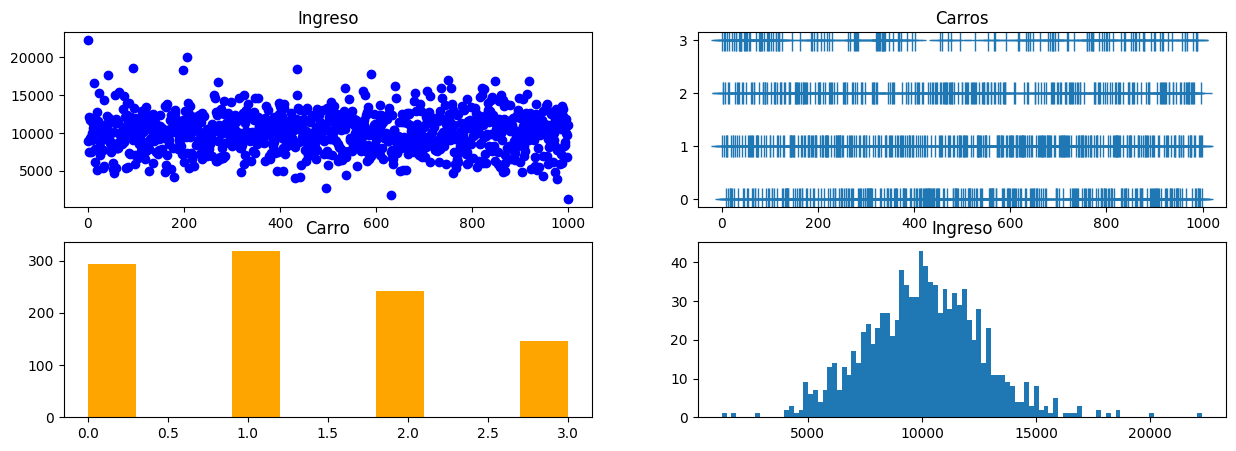

In [15]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_title('Ingreso')
ax1.plot(datos_personas['ingreso'], linewidth = 0, marker = 'o', color = 'blue', markersize = 6)
ax2.set_title('Carros')
ax2.plot(datos_personas['carros'], linewidth = 0, marker ='+', markersize = 16)
ax3.set_title('Carro')
ax3.hist(datos_personas['carros'], color = 'orange')
ax4.set_title('Ingreso')
ax4.hist(datos_personas['ingreso'], bins=100)
plt.show()

### __Tecnicas de Homogenizacion de datos__
__SE UTILIZA EL MODULO DE PREPROCESAMIENTO DE SKLEARN__   
Dar el peso a los datos 

#### __Escalar en funcion del minimo y maximo__
Que hace?   
fit_transform: recibe los datos y son convertidos a arrays de numpy. Luego se toma el minimo y maximo de cada columna   
los minimos pasan a ser 0 y los maxmimos pasan a ser 1 y a partir de esto se escalan los datos    
A partir de esto se garantiza la misma escala para los datos 

In [16]:
datos_min_max =  preprocessing.MinMaxScaler().fit_transform(datos_personas)
datos_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

#### __Normalizacion__ funcion de la normar del vector
Normalizar implica utilizar la norma del vector.    
El vector corresponde a los datos, lo que se busca es encontrar la magnitud del vector para simplificar los datos en terminos de valores entre 0 y 1    
La magnitud del vector depende de los elementos que se tienen garantizando que ningun elemento tenga una magnitud mayor a la de todo el elemento    
$$ normalizado = \frac{x}{\sqrt{(x_1^2 +x_2^2 +x_3^2+...)}} $$    

raiz: primer valor cuadrado + segundo cuadrado +... y raiz   
garantizando siempre un valor positivo   
Cada datos es divido por la norma que corresponde a la raíz    
Normalizar trbaja con reglones y no con columnas por eso se deben realizar las transpuestas

In [17]:
datos_normalizados =  preprocessing.Normalizer().transform(datos_personas.T)
datos_normalizados = datos_normalizados.T
datos_normalizados

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

#### __Estandarizacion de los datos  (desv est =1, media = 0)

Consiste en cambiar la distribucion de los datos para obtner una media 0 y una desviacion estandar de 1   
Esto se hace porque las tecnicas de ML trabajan bajo el supuesto de que los datos están distribuidos normalmente  
Esto se lográ usando la desviacion estandar y calculando medidas de centralidad (en este caso la media o el rango intercuartilico)    
La tranformacion es aplicada a cada una de las variables 

* Centralidad con la media
$$ estandarizado = \frac{x- media}{std} $$

* Centralidad con rango intercuartilico
$$ estandarizado = \frac{x- rango intercuartilico}{std} $$    

La distribucion estandar tiene valores positivos y negativos 

In [18]:
## Media
estandarizado_media = preprocessing.StandardScaler().fit_transform(datos_personas)

## Rango Intercuartilico
estandarizado_R_intercuartilico = preprocessing.RobustScaler().fit_transform(datos_personas)

estandarizado_media, estandarizado_R_intercuartilico

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

#### __Comparacion de metodos, Columna Ingreso__

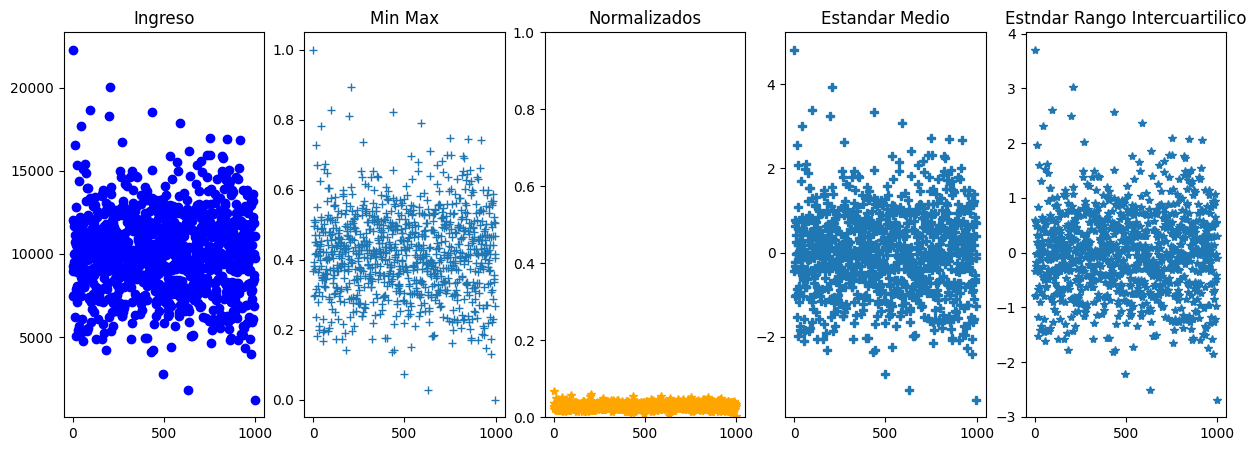

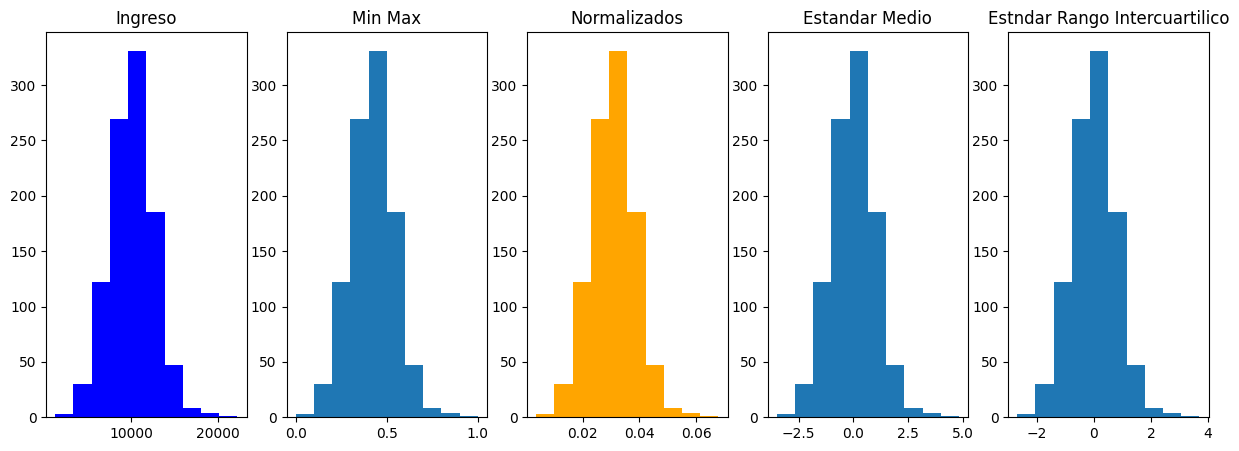

In [39]:
# Convierte vectores de numpy a Dataframes para graficarlos
datos_min_max = pd.DataFrame(datos_min_max, columns=['ingreso', 'carros'])
datos_normalizados = pd.DataFrame(datos_normalizados, columns=['ingreso', 'carros'])
estandarizado_media = pd.DataFrame(estandarizado_media, columns=['ingreso', 'carros'])
estandarizado_R_intercuartilico = pd.DataFrame(estandarizado_R_intercuartilico, columns=['ingreso', 'carros'])

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

## Series de datos
ax1.set_title('Ingreso')
ax1.plot(datos_personas['ingreso'], linewidth = 0, marker = 'o', color = 'blue')

ax2.set_title('Min Max')
ax2.plot(datos_min_max['ingreso'], marker ='+', linewidth = 0)
ax3.set_title('Normalizados')
ax3.plot(datos_normalizados['ingreso'], color = 'orange', marker= '*', linewidth = 0)
ax3.set_ylim(0,1)
ax4.set_title('Estandar Medio') 
ax4.plot(estandarizado_media['ingreso'], marker = 'P', linewidth = 0)
ax5.set_title('Estndar Rango Intercuartilico') 
ax5.plot(estandarizado_R_intercuartilico['ingreso'],  marker ='*', linewidth = 0)


## Series de histogramas Distribucion de los datos
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)
ax1.set_title('Ingreso')
ax1.hist(datos_personas['ingreso'], linewidth = 0,color = 'blue')
ax2.set_title('Min Max')
ax2.hist(datos_min_max['ingreso'], linewidth = 0)
ax3.set_title('Normalizados')
ax3.hist(datos_normalizados['ingreso'], color = 'orange')
ax4.set_title('Estandar Medio') 
ax4.hist(estandarizado_media['ingreso'])
ax5.set_title('Estndar Rango Intercuartilico') 
ax5.hist(estandarizado_R_intercuartilico['ingreso'])
plt.show()

#### Importante tener en cuenta la escala
* Min max es altamente afectado por los outliers

* Normalizer comprimió los datos [0.01, 0.07] debido al calculo de la norma (No es muy utilizado )

* Escalador Media, Escalador Inter: Intercuartilico no se ve afectado por los outliers

#### __Comparacion de metodos, Columna Carros__

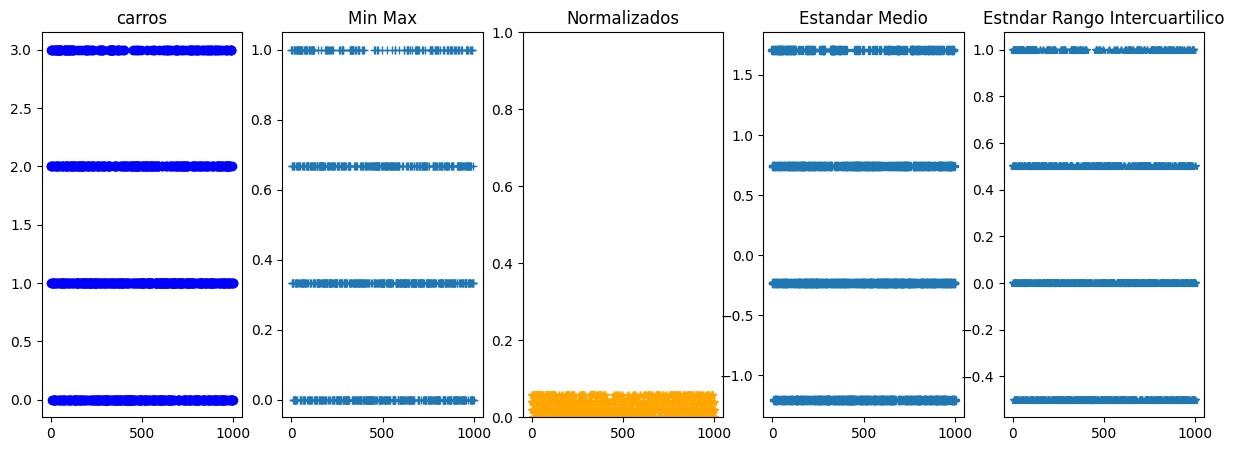

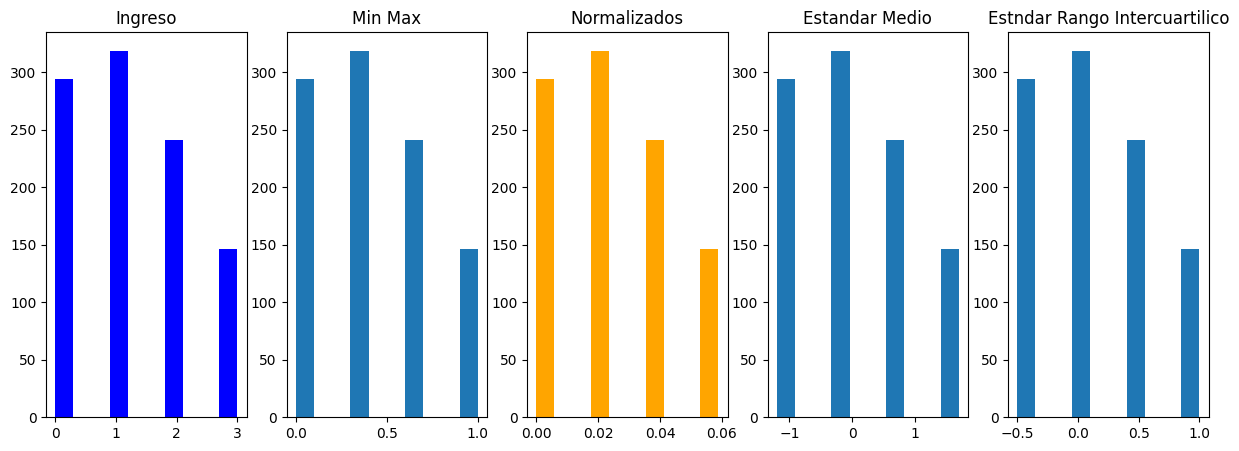

In [40]:

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

## Series de datos
ax1.set_title('carros')
ax1.plot(datos_personas['carros'], linewidth = 0, marker = 'o', color = 'blue')

ax2.set_title('Min Max')
ax2.plot(datos_min_max['carros'], marker ='+', linewidth = 0)
ax3.set_title('Normalizados')
ax3.plot(datos_normalizados['carros'], color = 'orange', marker= '*', linewidth = 0)
ax3.set_ylim(0,1)
ax4.set_title('Estandar Medio') 
ax4.plot(estandarizado_media['carros'], marker = 'P', linewidth = 0)
ax5.set_title('Estndar Rango Intercuartilico') 
ax5.plot(estandarizado_R_intercuartilico['carros'],  marker ='*', linewidth = 0)


## Series de histogramas Distribucion de los datos
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)
ax1.set_title('Ingreso')
ax1.hist(datos_personas['carros'], linewidth = 0,color = 'blue')
ax2.set_title('Min Max')
ax2.hist(datos_min_max['carros'], linewidth = 0)
ax3.set_title('Normalizados')
ax3.hist(datos_normalizados['carros'], color = 'orange')
ax4.set_title('Estandar Medio') 
ax4.hist(estandarizado_media['carros'])
ax5.set_title('Estndar Rango Intercuartilico') 
ax5.hist(estandarizado_R_intercuartilico['carros'])
plt.show()